train acc, test acc | 0.112366666667, 0.1135
train acc, test acc | 0.79215, 0.7946
train acc, test acc | 0.87745, 0.8819
train acc, test acc | 0.899266666667, 0.9017
train acc, test acc | 0.90705, 0.9113
train acc, test acc | 0.91415, 0.9188
train acc, test acc | 0.919033333333, 0.923
train acc, test acc | 0.922933333333, 0.9238
train acc, test acc | 0.926683333333, 0.9274
train acc, test acc | 0.929966666667, 0.9309
train acc, test acc | 0.933816666667, 0.9332
train acc, test acc | 0.93685, 0.9352
train acc, test acc | 0.938916666667, 0.9379
train acc, test acc | 0.940616666667, 0.9405
train acc, test acc | 0.943016666667, 0.9422
train acc, test acc | 0.944983333333, 0.9428
train acc, test acc | 0.94685, 0.9457


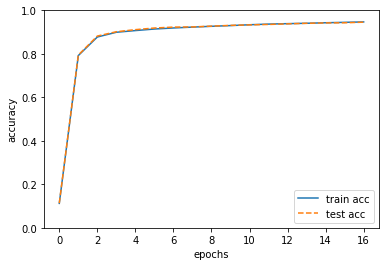

In [4]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet
%matplotlib inline

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()